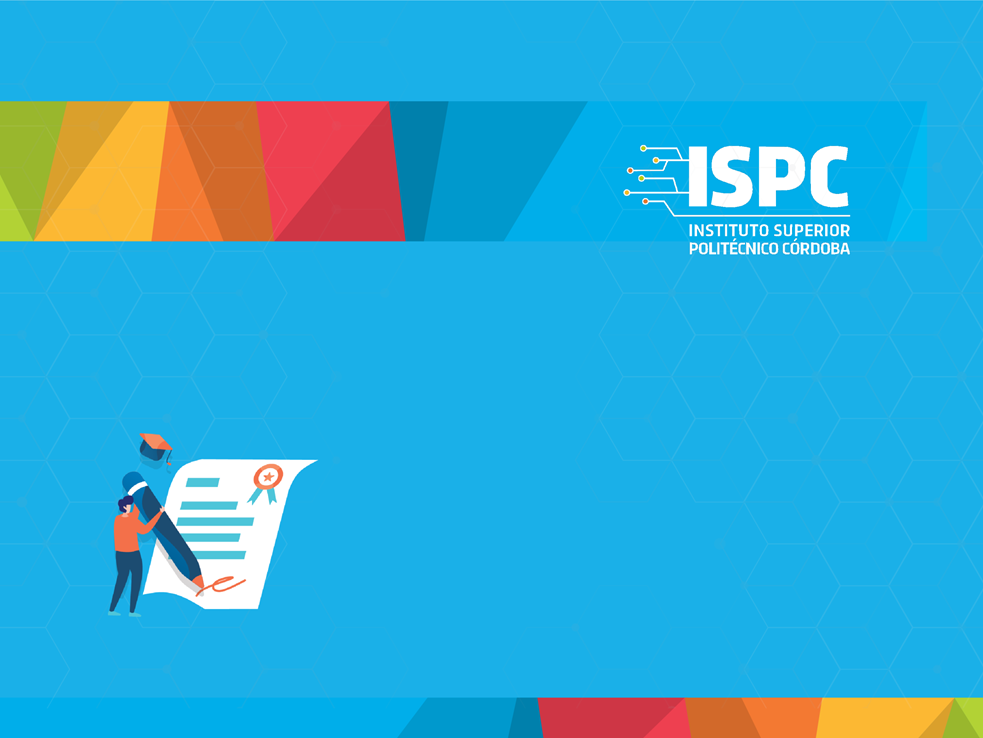

https://bradleyboehmke.github.io/HOML/mars.html


In [4]:
import numpy as np
import matplotlib.pyplot as plt

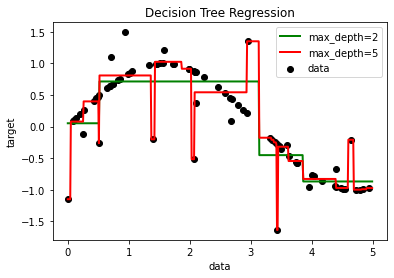

In [2]:
import numpy as np

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
from sklearn.tree import DecisionTreeRegressor

clf_1 = DecisionTreeRegressor(max_depth=2)
clf_2 = DecisionTreeRegressor(max_depth=5)
clf_1.fit(X, y)
clf_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = clf_1.predict(X_test)
y_2 = clf_2.predict(X_test)

# Plot the results
import pylab as pl

pl.figure()
pl.scatter(X, y, c="k", label="data")
pl.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
pl.plot(X_test, y_2, c="r", label="max_depth=5", linewidth=2)
pl.xlabel("data")
pl.ylabel("target")
pl.title("Decision Tree Regression")
pl.legend()
pl.show()

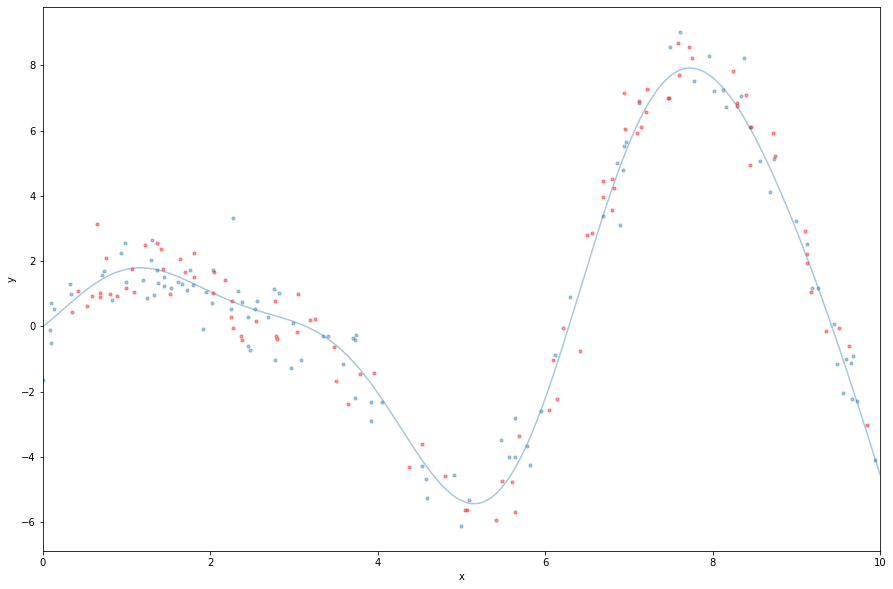

In [29]:



def ground_truth(x):
    """Ground truth -- function to approximate"""
    return x * np.sin(x) + np.sin(2 * x)

def gen_data(n_samples=200):
    """generate training and testing data"""
    np.random.seed(13)
    x = np.random.uniform(0, 10, size=n_samples)
    x.sort()
    y = ground_truth(x) + 0.75 * np.random.normal(size=n_samples)
    train_mask = np.random.randint(0, 2, size=n_samples).astype(np.bool)
    x_train, y_train = x[train_mask, np.newaxis], y[train_mask]
    x_test, y_test = x[~train_mask, np.newaxis], y[~train_mask]
    return x_train, x_test, y_train, y_test

X_train, X_test, y_train, y_test = gen_data(200)
# plot ground truth
x_plot = np.linspace(0, 10, 500)

def plot_data(figsize=(8, 5)):
    fig = plt.figure(figsize=figsize)
    gt = plt.plot(x_plot, ground_truth(x_plot), alpha=0.4, label='ground truth')
    # plot training and testing data
    plt.scatter(X_train, y_train, s=10, alpha=0.4)
    plt.scatter(X_test, y_test, s=10, alpha=0.4, color='red')
    plt.xlim((0, 10))
    plt.ylabel('y')
    plt.xlabel('x')

plot_data(figsize=(15, 10))

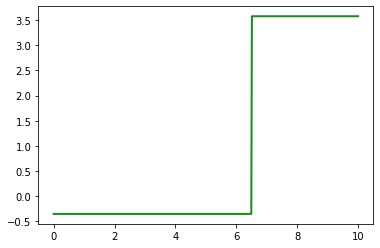

In [7]:
from sklearn.tree import DecisionTreeRegressor
#plot_data()
est = DecisionTreeRegressor(max_depth=1).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]),
label='RT max_depth=1', color='g', alpha=0.9, linewidth=2)


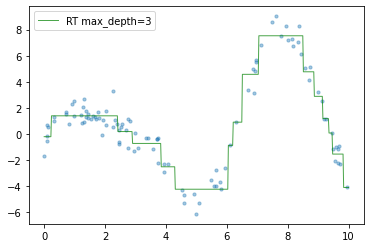

In [10]:
est = DecisionTreeRegressor(max_depth=4).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]),
label='RT max_depth=3', color='g', alpha=0.7, linewidth=1)
plt.scatter(X_train, y_train, s=10, alpha=0.4)
plt.legend(loc='upper left')

## Ejercicio

1- Generar los datos de la fución indicada a en la celda siguiente.
2- Aplicar diferentes regresores incluido la regresión lineal.
3- Calcular las métricas
4- Generar un reporte


$$ 
\begin{Bmatrix}
if & x<x1; & y=10 \\
if & x > x1 & and & x < x2; & y=20 \\
if & x > x2;  & y=40 
\end{Bmatrix}  $$